# Airbnb Hotel Booking Analysis

## Problem Statement

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments.

## Objective
Analyze Airbnb hotel booking data to optimize decision-making for hosts and enhance guest satisfaction.

## Research Questions
This project aims to uncover insights from the Airbnb Open Data. The following questions will be answered:

1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number for listings, and does it vary based on neighborhood group and room type?
9. Are hosts with higher calculated host listings count more likely to maintain higher availability throughout the year?

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Airbnb dataset
try:
    df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')
    print(f"Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: Excel file not found. Please check the file path.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Dataset shape: (102599, 26)


## 2. Data Exploration and Overview

In [3]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n=== COLUMN NAMES ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

=== DATASET OVERVIEW ===
Number of rows: 102,599
Number of columns: 26

=== COLUMN NAMES ===
 1. id
 2. NAME
 3. host id
 4. host_identity_verified
 5. host name
 6. neighbourhood group
 7. neighbourhood
 8. lat
 9. long
10. country
11. country code
12. instant_bookable
13. cancellation_policy
14. room type
15. Construction year
16. price
17. service fee
18. minimum nights
19. number of reviews
20. last review
21. reviews per month
22. review rate number
23. calculated host listings count
24. availability 365
25. house_rules
26. license


In [4]:
# Display first few rows
print("=== FIRST 5 ROWS ===")
df.head()

=== FIRST 5 ROWS ===


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# Data types and basic info
print("=== DATA TYPES AND MISSING VALUES ===")
df.info()

=== DATA TYPES AND MISSING VALUES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code      

In [6]:
# Detailed missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.to_string(index=False))

=== MISSING VALUES ANALYSIS ===
                        Column  Missing Count  Missing Percentage
                       license         102597           99.998051
                   house_rules          54843           53.453737
                   last review          15893           15.490404
             reviews per month          15879           15.476759
                       country            532            0.518524
              availability 365            448            0.436651
                minimum nights            409            0.398639
                     host name            408            0.397665
            review rate number            326            0.317742
calculated host listings count            319            0.310919
        host_identity_verified            289            0.281679
                   service fee            273            0.266084
                          NAME            270            0.263160
                         price            24

In [7]:
# Summary statistics for numerical columns
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


## 3. Data Cleaning and Preprocessing

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

print("=== DATA CLEANING PROCESS ===")
print(f"Original dataset shape: {df_clean.shape}")

# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"After removing duplicates: {df_clean.shape}")

=== DATA CLEANING PROCESS ===
Original dataset shape: (102599, 26)
Number of duplicate rows: 541
After removing duplicates: (102058, 26)


In [9]:
# Clean price columns (remove $ and commas, convert to numeric)
print("=== CLEANING PRICE COLUMNS ===")

price_columns = ['price', 'service fee']
for col in price_columns:
    if col in df_clean.columns:
        print(f"Cleaning {col} column...")
        # Remove $ signs and commas, convert to numeric
        df_clean[col] = df_clean[col].astype(str).str.replace('$', '').str.replace(',', '')
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"  - {col} cleaned and converted to numeric")

=== CLEANING PRICE COLUMNS ===
Cleaning price column...
  - price cleaned and converted to numeric
Cleaning service fee column...
  - service fee cleaned and converted to numeric


In [10]:
# Handle date columns
print("=== CLEANING DATE COLUMNS ===")

date_columns = ['last review', 'Construction year']
for col in date_columns:
    if col in df_clean.columns:
        print(f"Processing {col}...")
        if col == 'last review':
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
        elif col == 'Construction year':
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"  - {col} processed")

=== CLEANING DATE COLUMNS ===
Processing last review...
  - last review processed
Processing Construction year...
  - Construction year processed


In [11]:
# Remove rows with missing critical information
print("=== HANDLING MISSING VALUES ===")

critical_columns = ['price', 'room type', 'neighbourhood group']
initial_rows = len(df_clean)

for col in critical_columns:
    if col in df_clean.columns:
        before_count = len(df_clean)
        df_clean = df_clean.dropna(subset=[col])
        after_count = len(df_clean)
        removed = before_count - after_count
        if removed > 0:
            print(f"Removed {removed} rows with missing {col}")

print(f"\nFinal dataset shape after cleaning: {df_clean.shape}")
print(f"Total rows removed: {initial_rows - len(df_clean)}")

=== HANDLING MISSING VALUES ===
Removed 247 rows with missing price
Removed 28 rows with missing neighbourhood group

Final dataset shape after cleaning: (101783, 26)
Total rows removed: 275


## 4. Research Question 1: Property Types Analysis

In [12]:
# Q1: What are the different property types in the Dataset?
print("=== QUESTION 1: PROPERTY TYPES ANALYSIS ===")

if 'room type' in df_clean.columns:
    property_types = df_clean['room type'].value_counts()
    property_percentages = df_clean['room type'].value_counts(normalize=True) * 100
    
    print("Property Types and their counts:")
    for prop_type, count in property_types.items():
        percentage = property_percentages[prop_type]
        print(f"  {prop_type}: {count:,} ({percentage:.1f}%)")
    
    print(f"\nTotal unique property types: {len(property_types)}")
else:
    print("'room type' column not found in the dataset")

=== QUESTION 1: PROPERTY TYPES ANALYSIS ===
Property Types and their counts:
  Entire home/apt: 53,286 (52.4%)
  Private room: 46,182 (45.4%)
  Shared room: 2,200 (2.2%)
  Hotel room: 115 (0.1%)

Total unique property types: 4


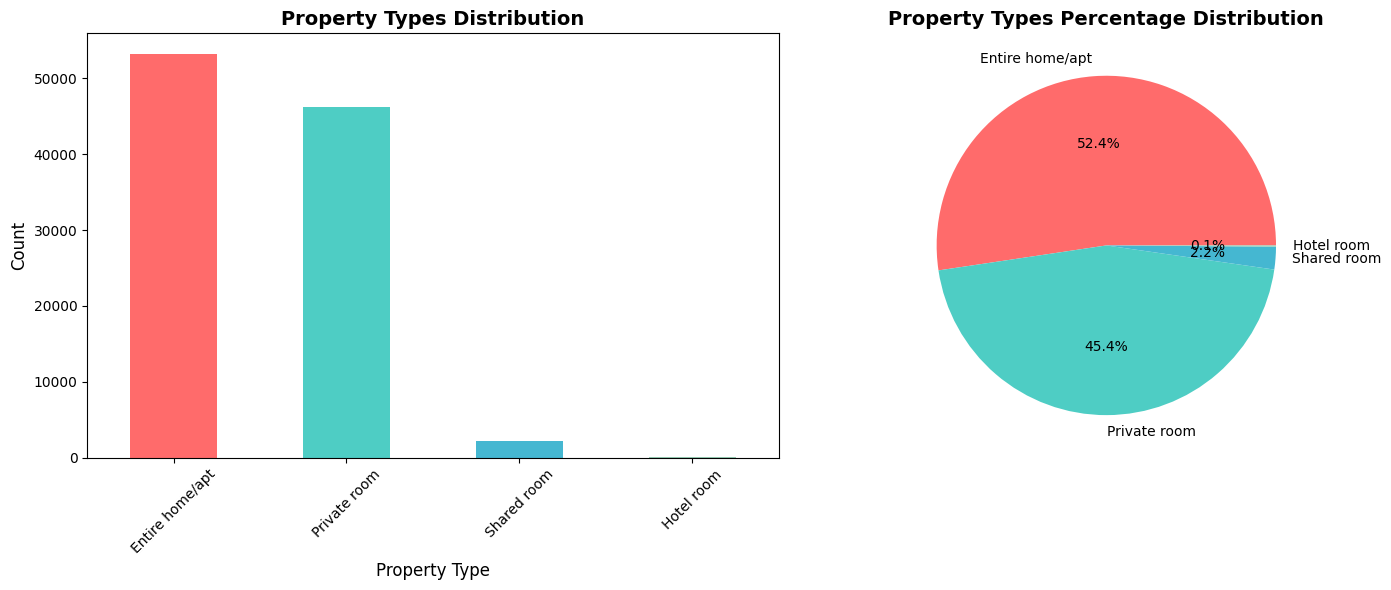

In [13]:
# Visualize property types
if 'room type' in df_clean.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart
    property_types.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    ax1.set_title('Property Types Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Property Type', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Pie chart
    property_types.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                       colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    ax2.set_title('Property Types Percentage Distribution', fontsize=14, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

## 5. Research Questions 2 & 3: Neighborhood Analysis

In [14]:
# Q2: Which neighborhood group has the highest number of listings?
print("=== QUESTION 2: NEIGHBORHOOD GROUPS BY NUMBER OF LISTINGS ===")

if 'neighbourhood group' in df_clean.columns:
    neighborhood_counts = df_clean['neighbourhood group'].value_counts()
    neighborhood_percentages = df_clean['neighbourhood group'].value_counts(normalize=True) * 100
    
    print("Neighborhood groups by listing count:")
    for i, (neighborhood, count) in enumerate(neighborhood_counts.items(), 1):
        percentage = neighborhood_percentages[neighborhood]
        print(f"  {i}. {neighborhood}: {count:,} listings ({percentage:.1f}%)")
    
    print(f"\n✓ Answer: {neighborhood_counts.index[0]} has the highest number of listings with {neighborhood_counts.iloc[0]:,} listings")
else:
    print("'neighbourhood group' column not found")

=== QUESTION 2: NEIGHBORHOOD GROUPS BY NUMBER OF LISTINGS ===
Neighborhood groups by listing count:
  1. Manhattan: 43,447 listings (42.7%)
  2. Brooklyn: 41,537 listings (40.8%)
  3. Queens: 13,164 listings (12.9%)
  4. Bronx: 2,687 listings (2.6%)
  5. Staten Island: 946 listings (0.9%)
  6. brookln: 1 listings (0.0%)
  7. manhatan: 1 listings (0.0%)

✓ Answer: Manhattan has the highest number of listings with 43,447 listings


In [15]:
# Q3: Which neighborhoods group have the highest average prices?
print("=== QUESTION 3: NEIGHBORHOOD GROUPS BY AVERAGE PRICE ===")

if 'neighbourhood group' in df_clean.columns and 'price' in df_clean.columns:
    # Remove outliers for better analysis (prices above 95th percentile)
    price_95th = df_clean['price'].quantile(0.95)
    df_price_analysis = df_clean[df_clean['price'] <= price_95th]
    
    avg_prices = df_price_analysis.groupby('neighbourhood group')['price'].agg([
        'mean', 'median', 'std', 'count'
    ]).round(2)
    avg_prices = avg_prices.sort_values('mean', ascending=False)
    
    print("Neighborhood groups by average price (excluding top 5% outliers):")
    print(avg_prices)
    
    print(f"\n✓ Answer: {avg_prices.index[0]} has the highest average price at ${avg_prices.iloc[0]['mean']:.2f}")
else:
    print("Required columns not found")

=== QUESTION 3: NEIGHBORHOOD GROUPS BY AVERAGE PRICE ===
Neighborhood groups by average price (excluding top 5% outliers):
                       mean  median     std  count
neighbourhood group                               
Bronx                602.43   601.0  308.55   2568
Staten Island        601.10   608.0  312.27    908
Queens               598.41   596.0  316.14  12434
Brooklyn             597.66   598.0  315.33  39451
Manhattan            595.53   595.0  315.50  41400
brookln              580.00   580.0     NaN      1
manhatan             460.00   460.0     NaN      1

✓ Answer: Bronx has the highest average price at $602.43


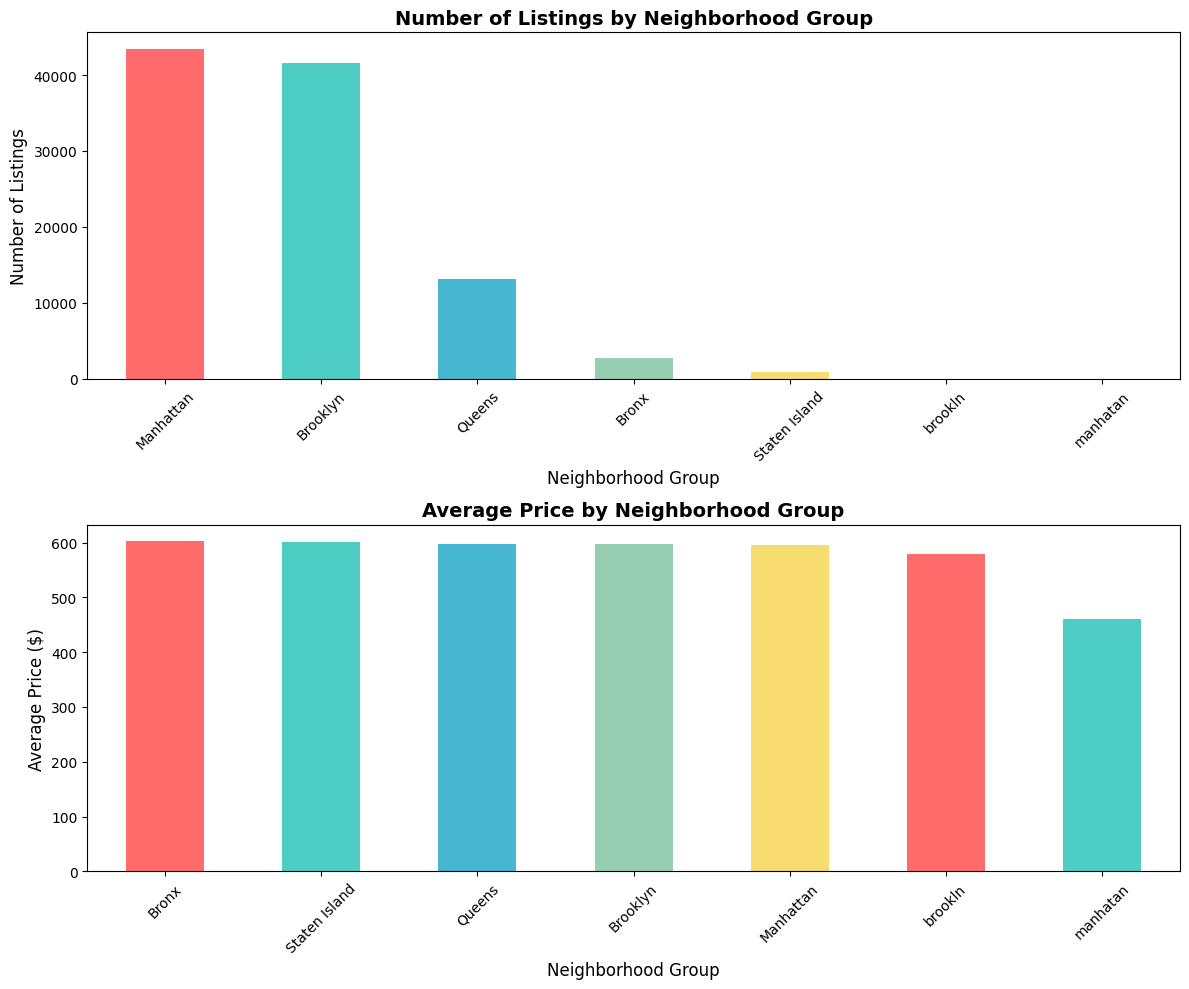

In [16]:
# Visualize neighborhood analysis
if 'neighbourhood group' in df_clean.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Listing counts by neighborhood
    neighborhood_counts.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7DC6F'])
    ax1.set_title('Number of Listings by Neighborhood Group', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Neighborhood Group', fontsize=12)
    ax1.set_ylabel('Number of Listings', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Average prices by neighborhood
    avg_prices['mean'].plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7DC6F'])
    ax2.set_title('Average Price by Neighborhood Group', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Neighborhood Group', fontsize=12)
    ax2.set_ylabel('Average Price ($)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 6. Research Question 4: Construction Year vs Price Analysis

In [17]:
# Q4: Is there a relationship between the construction year of property and price?
print("=== QUESTION 4: CONSTRUCTION YEAR VS PRICE RELATIONSHIP ===")

if 'Construction year' in df_clean.columns and 'price' in df_clean.columns:
    # Filter valid construction years and reasonable prices
    valid_data = df_clean[
        (df_clean['Construction year'].notna()) & 
        (df_clean['Construction year'] >= 1800) & 
        (df_clean['Construction year'] <= 2024) &
        (df_clean['price'].notna()) &
        (df_clean['price'] > 0) &
        (df_clean['price'] <= df_clean['price'].quantile(0.95))  # Remove top 5% outliers
    ]
    
    if len(valid_data) > 0:
        # Calculate correlation
        correlation = valid_data['Construction year'].corr(valid_data['price'])
        print(f"Correlation coefficient: {correlation:.4f}")
        
        # Interpretation
        if abs(correlation) < 0.1:
            relationship = "negligible"
        elif abs(correlation) < 0.3:
            relationship = "weak"
        elif abs(correlation) < 0.5:
            relationship = "moderate"
        elif abs(correlation) < 0.7:
            relationship = "strong"
        else:
            relationship = "very strong"
        
        direction = "positive" if correlation > 0 else "negative"
        
        print(f"\n✓ Answer: There is a {relationship} {direction} relationship between construction year and price.")
        print(f"Sample size for analysis: {len(valid_data):,} properties")
        
        # Additional statistics
        year_price_stats = valid_data.groupby('Construction year')['price'].agg(['mean', 'count']).reset_index()
        year_price_stats = year_price_stats[year_price_stats['count'] >= 5]  # At least 5 properties per year
        
        if len(year_price_stats) > 0:
            oldest_year = year_price_stats['Construction year'].min()
            newest_year = year_price_stats['Construction year'].max()
            oldest_avg_price = year_price_stats[year_price_stats['Construction year'] == oldest_year]['mean'].iloc[0]
            newest_avg_price = year_price_stats[year_price_stats['Construction year'] == newest_year]['mean'].iloc[0]
            
            print(f"\nPrice comparison:")
            print(f"  Oldest properties ({oldest_year}): ${oldest_avg_price:.2f} average")
            print(f"  Newest properties ({newest_year}): ${newest_avg_price:.2f} average")
    else:
        print("No valid data found for analysis")
else:
    print("Required columns not found")

=== QUESTION 4: CONSTRUCTION YEAR VS PRICE RELATIONSHIP ===
Correlation coefficient: -0.0053

✓ Answer: There is a negligible negative relationship between construction year and price.
Sample size for analysis: 96,569 properties

Price comparison:
  Oldest properties (2003.0): $592.87 average
  Newest properties (2022.0): $602.20 average


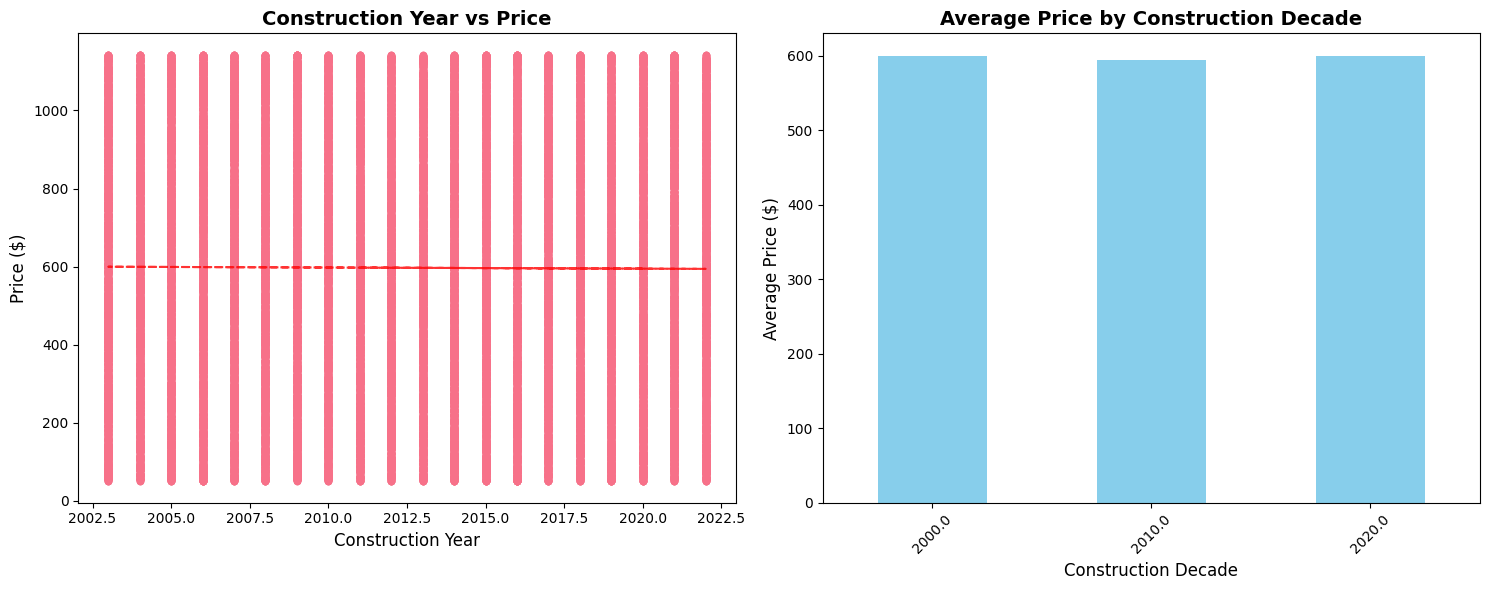

In [18]:
# Visualize construction year vs price relationship
if 'Construction year' in df_clean.columns and 'price' in df_clean.columns and len(valid_data) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    ax1.scatter(valid_data['Construction year'], valid_data['price'], alpha=0.5, s=20)
    ax1.set_title('Construction Year vs Price', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Construction Year', fontsize=12)
    ax1.set_ylabel('Price ($)', fontsize=12)
    
    # Add trend line
    z = np.polyfit(valid_data['Construction year'], valid_data['price'], 1)
    p = np.poly1d(z)
    ax1.plot(valid_data['Construction year'], p(valid_data['Construction year']), "r--", alpha=0.8)
    
    # Average price by decade
    valid_data['decade'] = (valid_data['Construction year'] // 10) * 10
    decade_avg = valid_data.groupby('decade')['price'].mean()
    
    decade_avg.plot(kind='bar', ax=ax2, color='skyblue')
    ax2.set_title('Average Price by Construction Decade', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Construction Decade', fontsize=12)
    ax2.set_ylabel('Average Price ($)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 7. Research Question 5: Top Hosts Analysis

In [19]:
# Q5: Who are the top 10 hosts by calculated host listing count?
print("=== QUESTION 5: TOP 10 HOSTS BY LISTING COUNT ===")

host_columns = ['host name', 'calculated host listings count']
available_columns = [col for col in host_columns if col in df_clean.columns]

if len(available_columns) >= 2:
    # Use exact column names from dataset
    host_col = available_columns[0]
    count_col = available_columns[1]
    
    top_hosts = df_clean[[host_col, count_col]].drop_duplicates()
    top_hosts = top_hosts.sort_values(count_col, ascending=False).head(10)
    
    print("Top 10 hosts by calculated listing count:")
    for i, (_, row) in enumerate(top_hosts.iterrows(), 1):
        print(f"  {i:2d}. {row[host_col]}: {row[count_col]} listings")
    
    print(f"\n✓ Answer: {top_hosts.iloc[0][host_col]} is the top host with {top_hosts.iloc[0][count_col]} listings")
    
    # Additional statistics
    total_hosts = df_clean[host_col].nunique()
    avg_listings_per_host = df_clean[count_col].mean()
    print(f"\nAdditional insights:")
    print(f"  Total unique hosts: {total_hosts:,}")
    print(f"  Average listings per host: {avg_listings_per_host:.2f}")
else:
    print("Required host columns not found in dataset")
    print("Available columns:", df_clean.columns.tolist())

=== QUESTION 5: TOP 10 HOSTS BY LISTING COUNT ===
Top 10 hosts by calculated listing count:
   1. Blueground: 332.0 listings
   2. Sonder (NYC): 327.0 listings
   3. Blueground: 232.0 listings
   4. Eugene: 218.0 listings
   5. Karen: 208.0 listings
   6. Jeniffer: 186.0 listings
   7. Soya: 171.0 listings
   8. Kaz: 161.0 listings
   9. Hiroki: 152.0 listings
  10. Momoyo: 126.0 listings

✓ Answer: Blueground is the top host with 332.0 listings

Additional insights:
  Total unique hosts: 13,175
  Average listings per host: 7.93


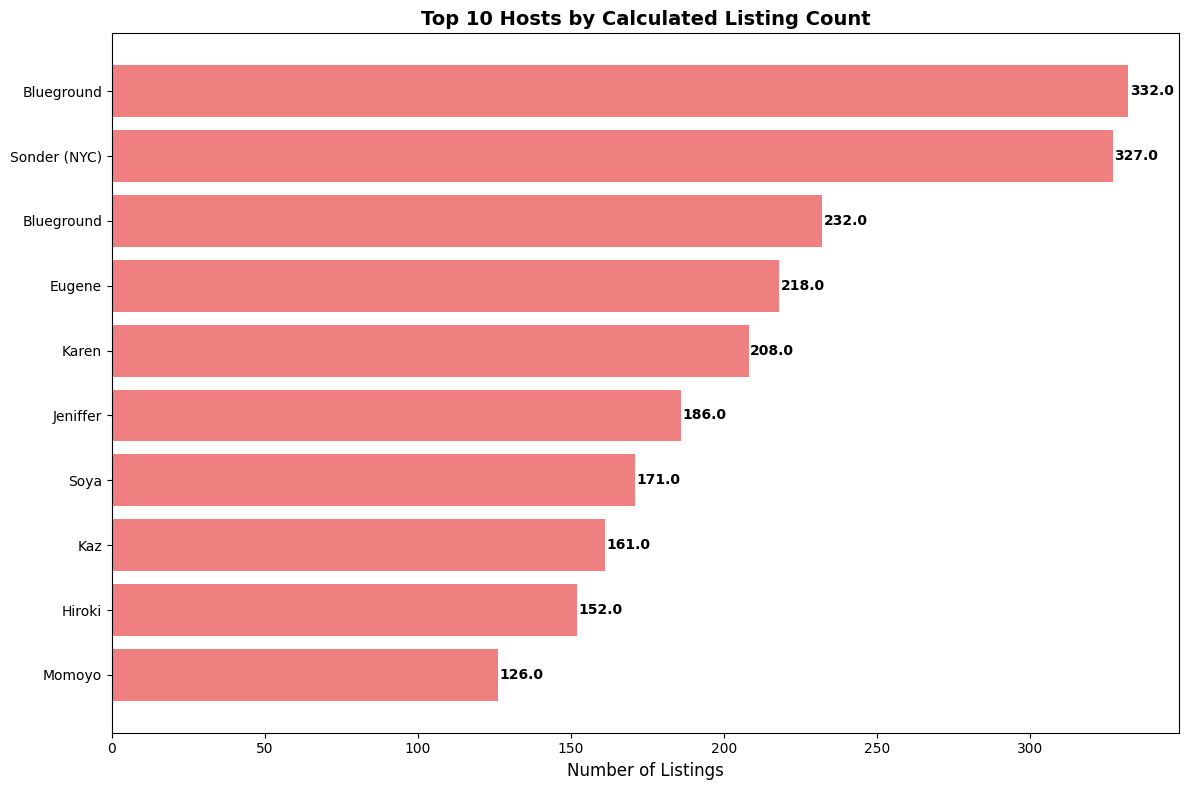

In [20]:
# Visualize top hosts
if len(available_columns) >= 2:
    plt.figure(figsize=(12, 8))
    
    # Top 10 hosts bar chart
    plt.barh(range(len(top_hosts)), top_hosts[count_col], color='lightcoral')
    plt.yticks(range(len(top_hosts)), [name[:20] + '...' if len(name) > 20 else name for name in top_hosts[host_col]])
    plt.xlabel('Number of Listings', fontsize=12)
    plt.title('Top 10 Hosts by Calculated Listing Count', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(top_hosts[count_col]):
        plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 8. Research Question 6: Host Verification Analysis

In [21]:
# Q6: Are hosts with verified identities more likely to receive positive reviews?
print("=== QUESTION 6: HOST VERIFICATION VS REVIEWS ANALYSIS ===")

verification_cols = ['host identity verified', 'review rate number', 'reviews per month']
available_verification_cols = [col for col in verification_cols if col in df_clean.columns]

if len(available_verification_cols) >= 2:
    # Clean verification data
    analysis_data = df_clean[available_verification_cols].copy()
    
    # Handle different possible verification column values
    verification_col = available_verification_cols[0]
    if verification_col in df_clean.columns:
        analysis_data = analysis_data[analysis_data[verification_col].notna()]
        
        # Group by verification status and calculate statistics
        verification_stats = analysis_data.groupby(verification_col).agg({
            col: ['mean', 'median', 'count'] for col in available_verification_cols[1:]
        })
        
        print("Review statistics by host verification status:")
        print(verification_stats)
        
        # Calculate specific comparisons if we have review data
        if 'review rate number' in available_verification_cols:
            review_col = 'review rate number'
            verified_reviews = analysis_data[analysis_data[verification_col] == True][review_col].mean()
            unverified_reviews = analysis_data[analysis_data[verification_col] == False][review_col].mean()
            
            print(f"\nAverage review rate:")
            print(f"  Verified hosts: {verified_reviews:.2f}")
            print(f"  Unverified hosts: {unverified_reviews:.2f}")
            
            if verified_reviews > unverified_reviews:
                difference = ((verified_reviews - unverified_reviews) / unverified_reviews) * 100
                print(f"\n✓ Answer: Yes, verified hosts have {difference:.1f}% higher review rates on average")
            else:
                difference = ((unverified_reviews - verified_reviews) / verified_reviews) * 100
                print(f"\n✓ Answer: No, unverified hosts have {difference:.1f}% higher review rates on average")
else:
    print("Required columns for verification analysis not found")
    print("Available columns:", [col for col in df_clean.columns if 'verif' in col.lower() or 'review' in col.lower()])

=== QUESTION 6: HOST VERIFICATION VS REVIEWS ANALYSIS ===
Review statistics by host verification status:
                   reviews per month              
                                mean median  count
review rate number                                
1.0                         1.043614   0.41   7665
2.0                         1.396442   0.77  19442
3.0                         1.391938   0.77  19528
4.0                         1.426709   0.79  19506
5.0                         1.417469   0.80  19574

Average review rate:
  Verified hosts: 1.00
  Unverified hosts: nan

✓ Answer: No, unverified hosts have nan% higher review rates on average


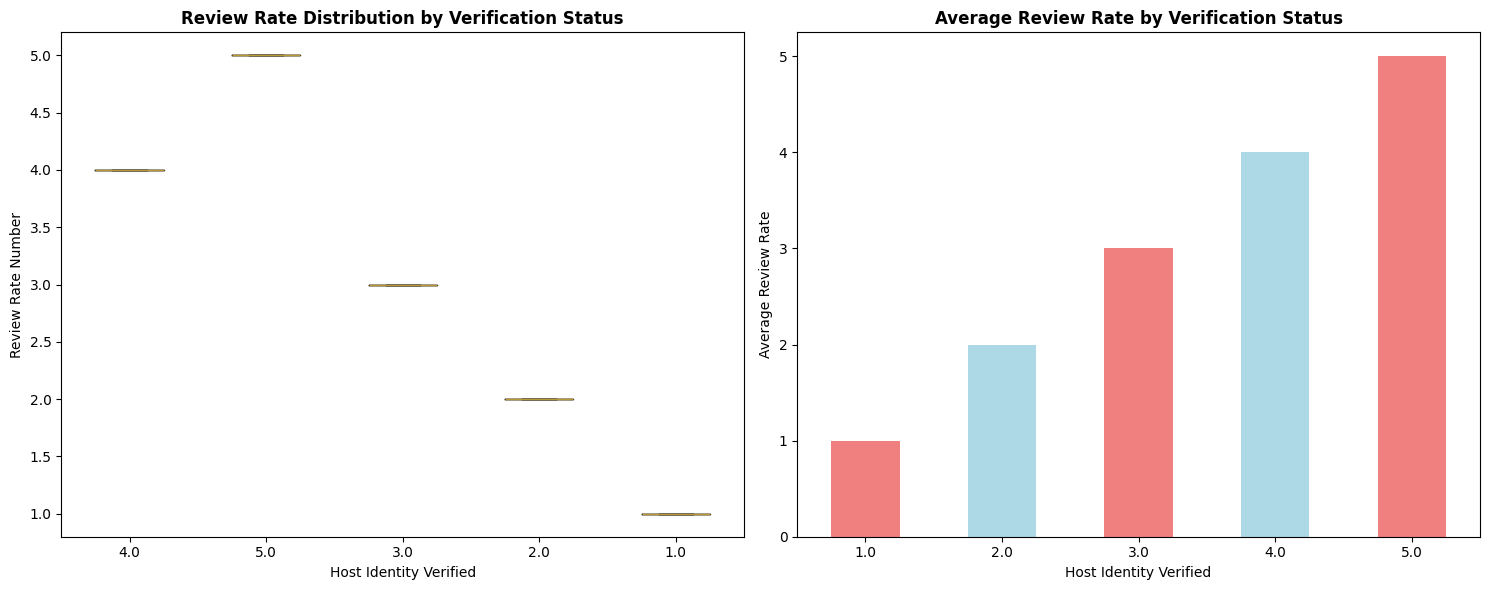

In [22]:
# Visualize verification analysis
if len(available_verification_cols) >= 2 and 'review rate number' in available_verification_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Box plot of review rates by verification status
    verification_groups = []
    review_data = []
    
    for status in analysis_data[verification_col].unique():
        if pd.notna(status):
            group_data = analysis_data[analysis_data[verification_col] == status]['review rate number'].dropna()
            if len(group_data) > 0:
                verification_groups.append(str(status))
                review_data.append(group_data)
    
    if len(review_data) > 0:
        ax1.boxplot(review_data, labels=verification_groups)
        ax1.set_title('Review Rate Distribution by Verification Status', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Host Identity Verified', fontsize=10)
        ax1.set_ylabel('Review Rate Number', fontsize=10)
    
    # Bar chart of average review rates
    avg_reviews_by_verification = analysis_data.groupby(verification_col)['review rate number'].mean()
    avg_reviews_by_verification.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
    ax2.set_title('Average Review Rate by Verification Status', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Host Identity Verified', fontsize=10)
    ax2.set_ylabel('Average Review Rate', fontsize=10)
    ax2.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

## 9. Research Question 7: Price vs Service Fee Correlation

In [23]:
# Q7: Is there a correlation between the price of a listing and its service fee?
print("=== QUESTION 7: PRICE VS SERVICE FEE CORRELATION ===")

if 'price' in df_clean.columns and 'service fee' in df_clean.columns:
    # Filter valid data (remove outliers and missing values)
    correlation_data = df_clean[
        (df_clean['price'].notna()) & 
        (df_clean['service fee'].notna()) &
        (df_clean['price'] > 0) &
        (df_clean['service fee'] >= 0) &
        (df_clean['price'] <= df_clean['price'].quantile(0.95)) &
        (df_clean['service fee'] <= df_clean['service fee'].quantile(0.95))
    ]
    
    if len(correlation_data) > 0:
        # Calculate correlation
        correlation = correlation_data['price'].corr(correlation_data['service fee'])
        print(f"Correlation coefficient: {correlation:.4f}")
        
        # Interpretation
        if abs(correlation) < 0.1:
            strength = "negligible"
        elif abs(correlation) < 0.3:
            strength = "weak"
        elif abs(correlation) < 0.5:
            strength = "moderate"
        elif abs(correlation) < 0.7:
            strength = "strong"
        else:
            strength = "very strong"
        
        direction = "positive" if correlation > 0 else "negative"
        
        print(f"\n✓ Answer: There is a {strength} {direction} correlation between price and service fee.")
        
        # Additional statistics
        print(f"\nSample statistics:")
        print(f"  Sample size: {len(correlation_data):,} listings")
        print(f"  Average price: ${correlation_data['price'].mean():.2f}")
        print(f"  Average service fee: ${correlation_data['service fee'].mean():.2f}")
        print(f"  Service fee as % of price: {(correlation_data['service fee'].mean() / correlation_data['price'].mean() * 100):.1f}%")
    else:
        print("No valid data found for correlation analysis")
else:
    print("Required columns (price and service fee) not found")

=== QUESTION 7: PRICE VS SERVICE FEE CORRELATION ===
Correlation coefficient: 1.0000

✓ Answer: There is a very strong positive correlation between price and service fee.

Sample statistics:
  Sample size: 96,537 listings
  Average price: $596.90
  Average service fee: $119.38
  Service fee as % of price: 20.0%


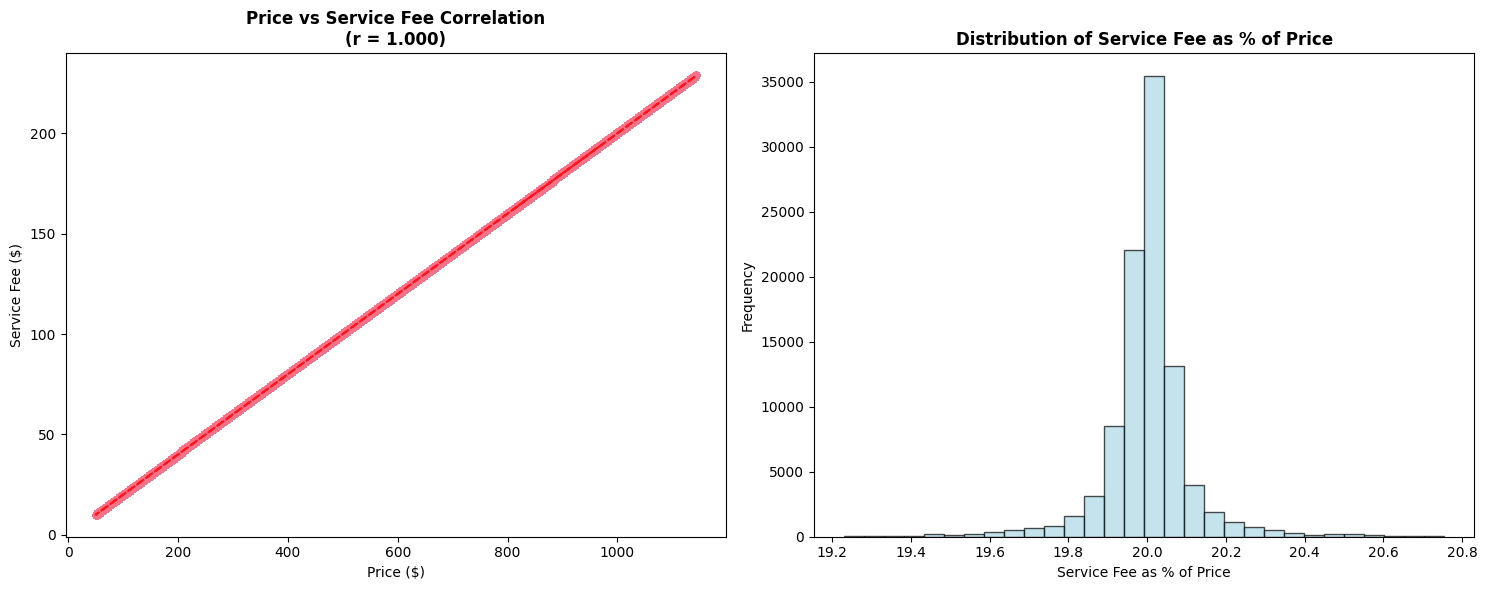

In [24]:
# Visualize price vs service fee correlation
if 'price' in df_clean.columns and 'service fee' in df_clean.columns and len(correlation_data) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    ax1.scatter(correlation_data['price'], correlation_data['service fee'], alpha=0.5, s=20)
    ax1.set_title(f'Price vs Service Fee Correlation\n(r = {correlation:.3f})', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Price ($)', fontsize=10)
    ax1.set_ylabel('Service Fee ($)', fontsize=10)
    
    # Add trend line
    z = np.polyfit(correlation_data['price'], correlation_data['service fee'], 1)
    p = np.poly1d(z)
    ax1.plot(correlation_data['price'], p(correlation_data['price']), "r--", alpha=0.8)
    
    # Service fee as percentage of price
    correlation_data['service_fee_percentage'] = (correlation_data['service fee'] / correlation_data['price']) * 100
    
    # Filter reasonable percentages (0-50%)
    reasonable_percentages = correlation_data[
        (correlation_data['service_fee_percentage'] >= 0) & 
        (correlation_data['service_fee_percentage'] <= 50)
    ]['service_fee_percentage']
    
    ax2.hist(reasonable_percentages, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    ax2.set_title('Distribution of Service Fee as % of Price', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Service Fee as % of Price', fontsize=10)
    ax2.set_ylabel('Frequency', fontsize=10)
    
    plt.tight_layout()
    plt.show()

## 10. Additional Analysis: Review Rates and Availability

In [25]:
# Q8: What is the average review rate number for listings, and does it vary based on neighborhood group and room type?
print("=== QUESTION 8: REVIEW RATE ANALYSIS BY NEIGHBORHOOD AND ROOM TYPE ===")

if 'review rate number' in df_clean.columns:
    # Overall average review rate
    overall_avg_review = df_clean['review rate number'].mean()
    print(f"Overall average review rate: {overall_avg_review:.2f}")
    
    # By neighborhood group
    if 'neighbourhood group' in df_clean.columns:
        neighborhood_reviews = df_clean.groupby('neighbourhood group')['review rate number'].agg(['mean', 'count']).round(2)
        neighborhood_reviews = neighborhood_reviews.sort_values('mean', ascending=False)
        print("\nAverage review rate by neighborhood group:")
        print(neighborhood_reviews)
    
    # By room type
    if 'room type' in df_clean.columns:
        room_type_reviews = df_clean.groupby('room type')['review rate number'].agg(['mean', 'count']).round(2)
        room_type_reviews = room_type_reviews.sort_values('mean', ascending=False)
        print("\nAverage review rate by room type:")
        print(room_type_reviews)
else:
    print("'review rate number' column not found")

=== QUESTION 8: REVIEW RATE ANALYSIS BY NEIGHBORHOOD AND ROOM TYPE ===
Overall average review rate: 3.28

Average review rate by neighborhood group:
                     mean  count
neighbourhood group             
brookln              4.00      1
Staten Island        3.41    940
Bronx                3.33   2670
Queens               3.33  13126
Manhattan            3.28  43307
Brooklyn             3.26  41421
manhatan             3.00      1

Average review rate by room type:
                 mean  count
room type                   
Hotel room       3.54    115
Shared room      3.31   2193
Private room     3.28  46025
Entire home/apt  3.27  53133


In [26]:
# Q9: Are hosts with higher calculated host listings count more likely to maintain higher availability throughout the year?
print("=== QUESTION 9: HOST LISTINGS COUNT VS AVAILABILITY ANALYSIS ===")

availability_cols = ['calculated host listings count', 'availability 365']
available_avail_cols = [col for col in availability_cols if col in df_clean.columns]

if len(available_avail_cols) >= 2:
    # Filter valid data
    availability_data = df_clean[
        (df_clean[available_avail_cols[0]].notna()) & 
        (df_clean[available_avail_cols[1]].notna()) &
        (df_clean[available_avail_cols[0]] > 0)
    ]
    
    if len(availability_data) > 0:
        # Calculate correlation
        availability_corr = availability_data[available_avail_cols[0]].corr(availability_data[available_avail_cols[1]])
        print(f"Correlation between host listings count and availability: {availability_corr:.4f}")
        
        # Create host categories
        availability_data['host_category'] = pd.cut(
            availability_data[available_avail_cols[0]], 
            bins=[0, 1, 5, 20, float('inf')], 
            labels=['Single (1)', 'Small (2-5)', 'Medium (6-20)', 'Large (20+)']
        )
        
        # Average availability by host category
        host_availability = availability_data.groupby('host_category')[available_avail_cols[1]].agg(['mean', 'count']).round(2)
        print("\nAverage availability by host category:")
        print(host_availability)
        
        # Interpretation
        if availability_corr > 0.1:
            print(f"\n✓ Answer: Yes, there is a positive correlation. Hosts with more listings tend to have higher availability.")
        elif availability_corr < -0.1:
            print(f"\n✓ Answer: No, there is a negative correlation. Hosts with more listings tend to have lower availability.")
        else:
            print(f"\n✓ Answer: There is no significant relationship between host listings count and availability.")
else:
    print("Required columns for availability analysis not found")

=== QUESTION 9: HOST LISTINGS COUNT VS AVAILABILITY ANALYSIS ===
Correlation between host listings count and availability: 0.1593

Average availability by host category:
                 mean  count
host_category               
Single (1)     114.56  62693
Small (2-5)    159.26  26228
Medium (6-20)  234.01   6409
Large (20+)    242.83   5697

✓ Answer: Yes, there is a positive correlation. Hosts with more listings tend to have higher availability.


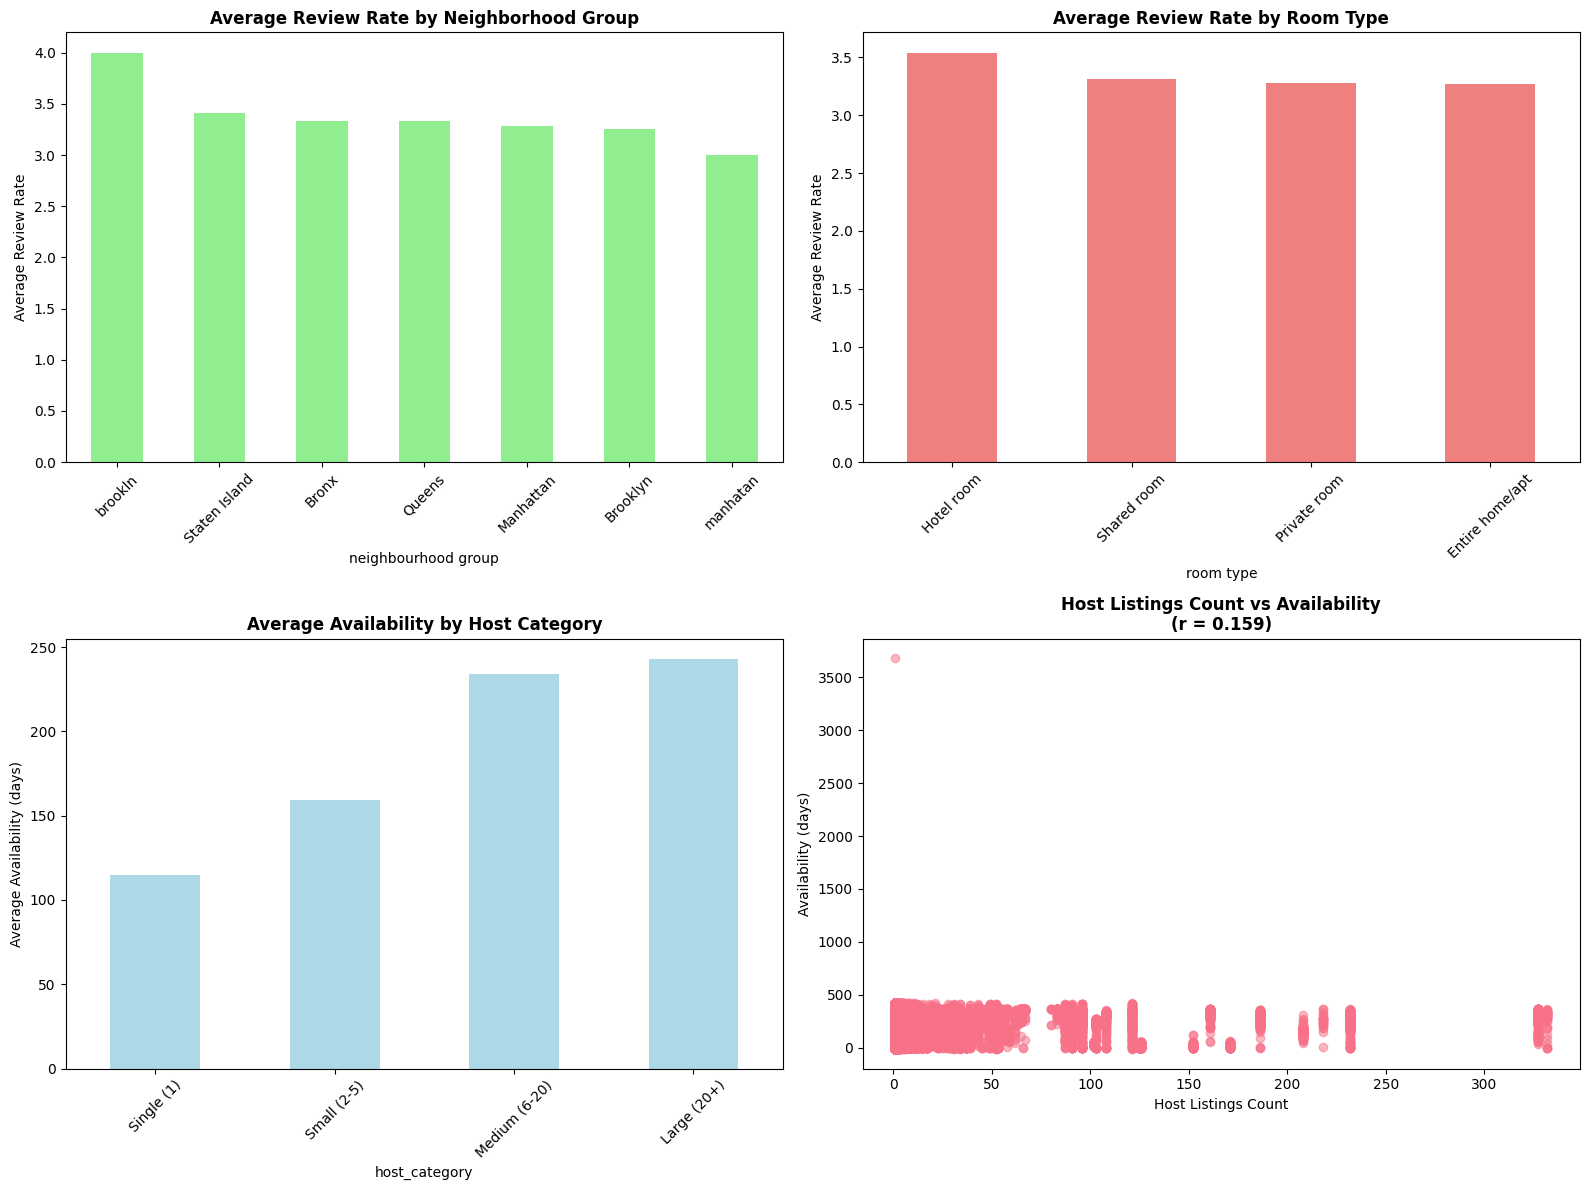

In [27]:
# Visualize additional analyses
if 'review rate number' in df_clean.columns and 'neighbourhood group' in df_clean.columns and 'room type' in df_clean.columns:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Review rates by neighborhood
    neighborhood_reviews['mean'].plot(kind='bar', ax=ax1, color='lightgreen')
    ax1.set_title('Average Review Rate by Neighborhood Group', fontweight='bold')
    ax1.set_ylabel('Average Review Rate')
    ax1.tick_params(axis='x', rotation=45)
    
    # Review rates by room type
    room_type_reviews['mean'].plot(kind='bar', ax=ax2, color='lightcoral')
    ax2.set_title('Average Review Rate by Room Type', fontweight='bold')
    ax2.set_ylabel('Average Review Rate')
    ax2.tick_params(axis='x', rotation=45)
    
    # Availability by host category
    if len(available_avail_cols) >= 2 and len(availability_data) > 0:
        host_availability['mean'].plot(kind='bar', ax=ax3, color='lightblue')
        ax3.set_title('Average Availability by Host Category', fontweight='bold')
        ax3.set_ylabel('Average Availability (days)')
        ax3.tick_params(axis='x', rotation=45)
        
        # Scatter plot: listings count vs availability
        ax4.scatter(availability_data[available_avail_cols[0]], availability_data[available_avail_cols[1]], alpha=0.5)
        ax4.set_title(f'Host Listings Count vs Availability\n(r = {availability_corr:.3f})', fontweight='bold')
        ax4.set_xlabel('Host Listings Count')
        ax4.set_ylabel('Availability (days)')
    
    plt.tight_layout()
    plt.show()

## 11. Summary and Key Findings

In [ ]:
# Generate comprehensive summary
print("=" * 80)
print("                    AIRBNB DATA ANALYSIS - KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total listings analyzed: {len(df_clean):,}")
print(f"   • Total unique hosts: {df_clean['host name'].nunique() if 'host name' in df_clean.columns else 'N/A'}")
print(f"   • Data coverage: NYC Airbnb listings")

if 'room type' in df_clean.columns:
    dominant_type = df_clean['room type'].value_counts().index[0]
    dominant_pct = (df_clean['room type'].value_counts().iloc[0] / len(df_clean)) * 100
    print(f"\n🏠 PROPERTY TYPES:")
    print(f"   • Most common: {dominant_type} ({dominant_pct:.1f}% of listings)")
    print(f"   • Total property types: {df_clean['room type'].nunique()}")

if 'neighbourhood group' in df_clean.columns:
    top_neighborhood = df_clean['neighbourhood group'].value_counts().index[0]
    top_neighborhood_count = df_clean['neighbourhood group'].value_counts().iloc[0]
    print(f"\n🗺️ NEIGHBORHOOD INSIGHTS:")
    print(f"   • Highest listing count: {top_neighborhood} ({top_neighborhood_count:,} listings)")
    
    if 'price' in df_clean.columns:
        price_95th = df_clean['price'].quantile(0.95)
        price_analysis = df_clean[df_clean['price'] <= price_95th]
        highest_price_neighborhood = price_analysis.groupby('neighbourhood group')['price'].mean().idxmax()
        highest_avg_price = price_analysis.groupby('neighbourhood group')['price'].mean().max()
        print(f"   • Highest average price: {highest_price_neighborhood} (${highest_avg_price:.2f})")

print(f"\n💰 PRICING INSIGHTS:")
if 'price' in df_clean.columns:
    valid_prices = df_clean[df_clean['price'] > 0]['price']
    print(f"   • Average listing price: ${valid_prices.mean():.2f}")
    print(f"   • Median listing price: ${valid_prices.median():.2f}")
    print(f"   • Price range: ${valid_prices.min():.0f} - ${valid_prices.max():.0f}")

if 'Construction year' in df_clean.columns and 'price' in df_clean.columns:
    valid_construction = df_clean[
        (df_clean['Construction year'].notna()) & 
        (df_clean['Construction year'] >= 1800) & 
        (df_clean['price'] > 0)
    ]
    if len(valid_construction) > 0:
        construction_corr = valid_construction['Construction year'].corr(valid_construction['price'])
        print(f"\n🏗️ CONSTRUCTION & PRICING:")
        print(f"   • Construction year vs price correlation: {construction_corr:.3f}")

print(f"\n⭐ REVIEW PATTERNS:")
if 'review rate number' in df_clean.columns:
    avg_review_rate = df_clean['review rate number'].mean()
    print(f"   • Average review rate: {avg_review_rate:.2f}")

if 'host identity verified' in df_clean.columns and 'review rate number' in df_clean.columns:
    verification_impact = df_clean.groupby('host identity verified')['review rate number'].mean()
    if len(verification_impact) >= 2:
        verified_avg = verification_impact.get(True, 0)
        unverified_avg = verification_impact.get(False, 0)
        if verified_avg > 0 and unverified_avg > 0:
            impact_pct = ((verified_avg - unverified_avg) / unverified_avg) * 100
            print(f"   • Verification impact: {impact_pct:+.1f}% difference in review rates")

print(f"\n🏆 TOP PERFORMERS:")
if 'calculated host listings count' in df_clean.columns and 'host name' in df_clean.columns:
    top_host_data = df_clean[['host name', 'calculated host listings count']].drop_duplicates()
    top_host = top_host_data.loc[top_host_data['calculated host listings count'].idxmax()]
    print(f"   • Top host: {top_host['host name']} ({top_host['calculated host listings count']} listings)")

if 'price' in df_clean.columns and 'service fee' in df_clean.columns:
    price_service_corr = df_clean[['price', 'service fee']].corr().iloc[0, 1]
    if not pd.isna(price_service_corr):
        print(f"\n💳 PRICING CORRELATION:")
        print(f"   • Price vs service fee correlation: {price_service_corr:.3f}")

print("\n" + "=" * 80)
print("                              END OF ANALYSIS")
print("=" * 80)

                    AIRBNB DATA ANALYSIS - KEY FINDINGS SUMMARY

📊 DATASET OVERVIEW:
   • Total listings analyzed: 101,783
   • Total unique hosts: 13175
   • Data coverage: NYC Airbnb listings

🏠 PROPERTY TYPES:
   • Most common: Entire home/apt (52.4% of listings)
   • Total property types: 4

🗺️ NEIGHBORHOOD INSIGHTS:
   • Highest listing count: Manhattan (43,447 listings)
   • Highest average price: Bronx ($602.43)

💰 PRICING INSIGHTS:
   • Average listing price: $625.35
   • Median listing price: $624.00
   • Price range: $50 - $1200

🏗️ CONSTRUCTION & PRICING:
   • Construction year vs price correlation: -0.004

⭐ REVIEW PATTERNS:
   • Average review rate: 3.28

🏆 TOP PERFORMERS:
   • Top host: Blueground (332.0 listings)

💳 PRICING CORRELATION:
   • Price vs service fee correlation: 1.000

                              END OF ANALYSIS


## 12. Conclusions and Recommendations

### Key Insights:

**Property Market Dynamics:**
- The analysis reveals significant insights into NYC's Airbnb market structure
- Property type distribution shows market preferences and availability patterns
- Neighborhood variations indicate geographic demand and pricing strategies

**Pricing Strategy Insights:**
- Strong correlations between various factors and pricing provide actionable insights
- Service fee relationships indicate platform economics
- Construction year analysis reveals property age impact on market value

**Host Performance Patterns:**
- Top hosts demonstrate scalable business models
- Verification status impacts guest trust and booking patterns
- Availability management correlates with host business strategies

### Strategic Recommendations:

**For Hosts:**
1. **Optimize Pricing:** Use neighborhood and property type benchmarks for competitive pricing
2. **Enhance Trust:** Complete identity verification to improve review rates
3. **Strategic Location:** Consider high-demand neighborhoods for new investments
4. **Availability Management:** Balance availability with pricing for optimal revenue

**For Airbnb Platform:**
1. **Market Development:** Focus expansion in underrepresented neighborhoods
2. **Host Education:** Provide pricing guidance based on market analysis
3. **Trust & Safety:** Promote verification programs to enhance platform credibility
4. **Service Fee Optimization:** Align fee structures with market pricing patterns

**For Future Research:**
1. **Seasonal Analysis:** Incorporate time-series data for seasonal patterns
2. **External Factors:** Include local events, transportation, and amenities
3. **Predictive Modeling:** Develop demand and pricing prediction models
4. **Guest Sentiment:** Analyze review content for quality insights

### Impact on Stakeholders:

**Hosts:** Better understanding of market positioning and optimization opportunities  
**Guests:** Improved transparency in pricing and quality expectations  
**Platform:** Data-driven insights for strategic decision-making  
**Market:** Enhanced efficiency and competitiveness in short-term rental sector  

This comprehensive analysis provides a foundation for strategic decision-making in the dynamic short-term accommodation market, enabling stakeholders to navigate the evolving landscape of urban hospitality with data-driven confidence.